# Titanic_classification


### import Libraries

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Data Load & Preprocessing

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Survived
0    549
1    342
Name: count, dtype: int64




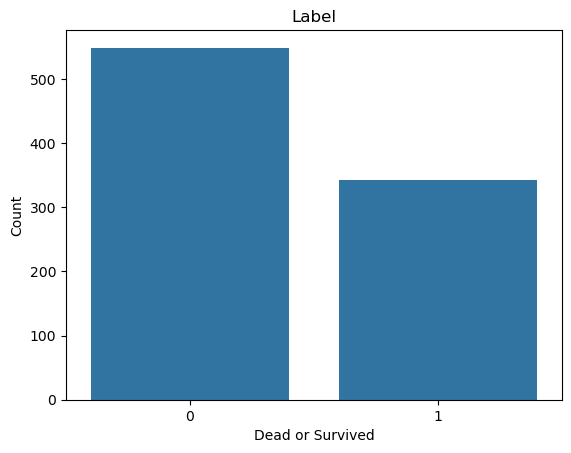

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64




In [36]:
url = "https://github.com/MyungKyuYi/AI-class/raw/main/titanic.csv"
df = pd.read_csv(url)

# 컬럼명 확인
print(df.columns)
print("\n=====================================================\n")

# 레이블 갯수 확인 (숫자)
print(df['Survived'].value_counts())
print("\n=====================================================\n")

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Survived")
plt.xlabel("Dead or Survived")
plt.ylabel("Count")
plt.title("Label")
plt.show()

# 결측치 확인
print(df.isnull().sum())
print("\n=====================================================\n")

# 타이타닉 생존 여부를 따질 때 이름, 티켓명, cabin, 탑승한 항구번호는 상관관계가 없으므로 컬럼 삭제.
columns_to_delete = ['Name', 'Ticket', 'Cabin', 'Embarked'] # 삭제할 컬럼 리스트
df = df.drop(columns=columns_to_delete) # 컬럼 삭제

# 결측치 확인
print(df.isnull().sum())
print("\n=====================================================\n")

# 남아있는 결측치(Age) 처리
# Age는 생존 여부와 상관관계가 있으므로 Cabin처럼 컬럼을 삭제하면 안된다.
# 대신 평균값으로 mapping하는 방식으로 처리한다.
mean_age = df['Age'].mean() # age 컬럼의 평균값 계산 (결측치를 제외한 값으로 계산)
df['Age'] = df['Age'].fillna(mean_age) # age 컬럼의 결측치를 평균값으로 채우기

# 결측치 확인
print(df.isnull().sum())
print("\n=====================================================\n")

# 남아있는 범주형 데이터 컬럼(Sex)을 먼저 Encoding한다.
# Sex 컬럼을 Label Encoding으로 변환
# 참고: StandardScaler()는 범주형 데이터를 처리할 수 없음.
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# 데이터 전처리 완료

### Data Preparation & Scaling

In [38]:
# 데이터 준비
X = df.drop('Survived', axis=1) # 데이터 특성 (Survived 컬럼 제외)
Y = df['Survived'] # 레이블 (Survived 컬럼)

# 데이터 분할 (Training Data 70%와 Test Data 30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 데이터 표준화
# SVM 모델과 LR 모델은 거리 기반 또는 경사 하강법을 사용하므로,
# 특성 값의 범위 차이가 크면 학습이 제대로 되지 않거나 성능이 저하될 수 있기 때문에 표준화된 데이터를 사용해야 한다.
# KNN 알고리즘 또한 거리 기반 알고리즘이므로 데이터 표준화가 필요하다.
# df.describe() 함수를 통해 확인해 본 결과 표준화된 데이터가 아니므로 표준화를 진행한다.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train & Test & Report

In [44]:
# Decision Tree (DT)
print("\n=====================================================\n")
dt_model = DecisionTreeClassifier() # DT 모델 생성.
dt_model.fit(X_train, Y_train) # 모델 학습.
dt_predictions = dt_model.predict(X_test) # 예측. 즉, dt_predictions에는 테스트 데이터 특성(X_test)에 따라 예측한 Y값이 들어있는 것.
print("Decision Tree Accuracy:", accuracy_score(Y_test, dt_predictions)) # 예측한 값과 실제 Y값을 비교하여 정확도 평가.
print("\nDecision Tree Classification Report:\n", classification_report(Y_test, dt_predictions))
print("DT Confusion Matrix:\n", confusion_matrix(Y_test, dt_predictions)) # 혼동 행렬 출력

# Random Forest (RF)
print("\n=====================================================\n")
rf_model = RandomForestClassifier() # RF 모델 생성.
rf_model.fit(X_train, Y_train) # 모델 학습.
rf_predictions = rf_model.predict(X_test) # 예측. 즉, rf_predictions에는 테스트 데이터 특성(X_test)에 따라 예측한 Y값이 들어있는 것.
print("Random Forest Accuracy:", accuracy_score(Y_test, rf_predictions)) # 예측한 값과 실제 Y값을 비교하여 정확도 평가.
print("\nRandom Forest Classification Report:\n", classification_report(Y_test, rf_predictions))
print("RF Confusion Matrix:\n", confusion_matrix(Y_test, rf_predictions)) # 혼동 행렬 출력

# Support Vector Machine (SVM)
print("\n=====================================================\n")
svm_model = SVC() # SVM 모델 생성.
svm_model.fit(X_train, Y_train) # 모델 학습.
svm_predictions = svm_model.predict(X_test) # 예측. 즉, svm_predictions에는 테스트 데이터 특성(X_test)에 따라 예측한 Y값이 들어있는 것.
print("SVM Accuracy:", accuracy_score(Y_test, svm_predictions)) # 예측한 값과 실제 Y값을 비교하여 정확도 평가.
print("\nSVM Classification Report:\n", classification_report(Y_test, svm_predictions))
print("SVM Confusion Matrix:\n", confusion_matrix(Y_test, svm_predictions)) # 혼동 행렬 출력

# Logistic Regression (LR)
print("\n=====================================================\n")
lr_model = LogisticRegression() # LR 모델 생성.
lr_model.fit(X_train, Y_train) # 모델 학습.
lr_predictions = lr_model.predict(X_test) # 예측. 즉, lr_predictions에는 테스트 데이터 특성(X_test)에 따라 예측한 Y값이 들어있는 것.
print("Logistic Regression Accuracy:", accuracy_score(Y_test, lr_predictions)) # 예측한 값과 실제 Y값을 비교하여 정확도 평가.
print("\nLogistic Regression Classification Report:\n", classification_report(Y_test, lr_predictions))
print("LR Confusion Matrix:\n", confusion_matrix(Y_test, lr_predictions)) # 혼동 행렬 출력

# K-Nearest Neighbors (KNN)
print("\n=====================================================\n")
knn_model = KNeighborsClassifier(n_neighbors=5)  # 기본적으로 K=5 사용
knn_model.fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(Y_test, knn_predictions))
print("\nKNN Algorithm Classification Report:\n", classification_report(Y_test, knn_predictions))
print("KNN Confusion Matrix:\n", confusion_matrix(Y_test, knn_predictions)) # 혼동 행렬 출력



Decision Tree Accuracy: 0.7313432835820896

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78       157
           1       0.69      0.65      0.67       111

    accuracy                           0.73       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.73      0.73      0.73       268

DT Confusion Matrix:
 [[124  33]
 [ 39  72]]


Random Forest Accuracy: 0.8059701492537313

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       157
           1       0.84      0.66      0.74       111

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268

RF Confusion Matrix:
 [[143  14]
 [ 38  73]]


SVM Accuracy: 0.8283582089552238

SVM Classification Report:
               precision 